In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [23]:
df=pd.read_csv("../OverviewReport.csv")
df['PageLength']=df[' PdfPages (meta)'].str.replace(r'\(.*\)','').astype(int)


 
print(df.shape)
df.head()

(368, 12)


,WobFile,WobURL,WobTitle,WobDate,PdfName,PdfUrl,PdfDate,Size,PdfTitle,PdfPages (meta),WordsPerPage,PageLength
0,5e745681a2659dadb7ac782f4e012350,https://wobcovid19.rijksoverheid.nl/publicatie...,Besluit Wob-verzoek logboeken ambtenaren coron...,6/9/2020 0:00,Besluit,https://wobcovid19.rijksoverheid.nl/publicatie...,9/6/2020,81 kB,NaN,1 (1),232,1
1,b5ca6a88b275fda712ca471bb77fec92,https://wobcovid19.rijksoverheid.nl/publicatie...,Besluit Wob-verzoek logboeken coronacrisis min...,6/9/2020 0:00,Besluit,https://wobcovid19.rijksoverheid.nl/publicatie...,9/6/2020,71 kB,NaN,1 (1),197,1
2,5d450bf985589e1cbc6f16aa43d9fe29,https://wobcovid19.rijksoverheid.nl/publicatie...,Besluit Wob-verzoek Tozo-beschikkingen,7/30/2020 0:00,Besluit,https://wobcovid19.rijksoverheid.nl/publicatie...,30-07-2020,945 kB,NaN,3 (3),208,3
3,5d450bf985589e1cbc6f16aa43d9fe29,https://wobcovid19.rijksoverheid.nl/publicatie...,Besluit Wob-verzoek Tozo-beschikkingen,7/30/2020 0:00,Lijst van documenten,https://wobcovid19.rijksoverheid.nl/publicatie...,30-07-2020,292 kB,NaN,4 (4),352,4
4,5d450bf985589e1cbc6f16aa43d9fe29,https://wobcovid19.rijksoverheid.nl/publicatie...,Besluit Wob-verzoek Tozo-beschikkingen,7/30/2020 0:00,Openbaar gemaakte documenten,https://wobcovid19.rijksoverheid.nl/publicatie...,30-07-2020,6 MB,NaN,180 (180),202,180


count     368.000000
mean       68.763587
std       147.127634
min         0.000000
25%         5.000000
50%        15.000000
75%        75.250000
max      1481.000000
Name: PageLength, dtype: float64


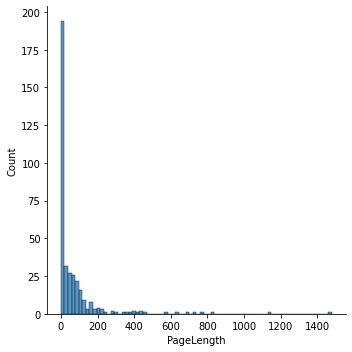

In [24]:

print(df.PageLength.describe())
sns.displot(df['PageLength']);

# Alternatieve telling van aantal paginas per file

* via de pdftohtml output
* gek genoeg hebben we wel een flink aantal minder files...
* Maar goed, de aantallen zijn echt anders.


count     328.000000
mean       99.317073
std       337.768124
min         1.000000
25%         5.000000
50%        19.500000
75%        80.000000
max      4910.000000
dtype: float64

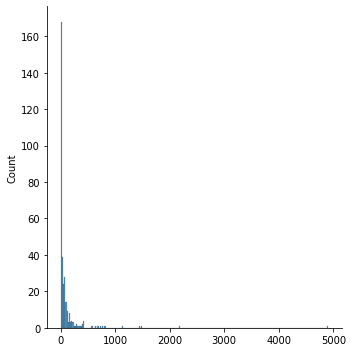

In [33]:
L=! grep -c '/page>' ../CovidWOBPDFs/*.xml
pagelengths={r.split(':')[0]: int(r.split(':')[1]) for r in  L}
PL= pd.Series(pagelengths)
sns.displot(PL)
PL.describe()